    Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Programacao/Projeto_Final_ICD/1950-2019.csv")
df = pd.DataFrame(data)

In [3]:
del df["Unnamed: 0"]
del df["len"]
del df["age"]
df.isnull().values.any()

False

    LINEPLOT ENTRE ANO DE LANÇAMENTO CORRELACIONADO COM A OBSCENDIDADE DAS MÚSICAS

<AxesSubplot:xlabel='release_date', ylabel='obscene'>

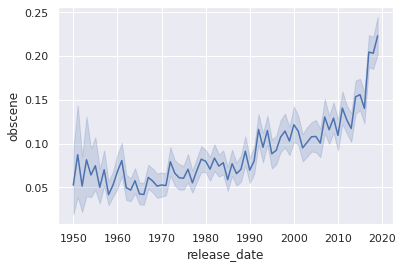

In [4]:
sns.set_theme()
sns.lineplot(x="release_date", y="obscene", data= df)

    BARPLOT ENTRE OS GÊNEROS MUSICAIS E A OBSCENIDADE DAS MÚSICAS

<AxesSubplot:xlabel='genre', ylabel='obscene'>

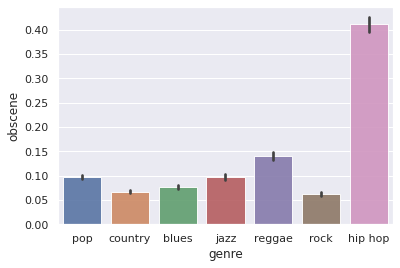

In [5]:
sns.barplot(x="genre", y="obscene", data= df,alpha=0.9)

    DISPLOT DOS GÊNEROS

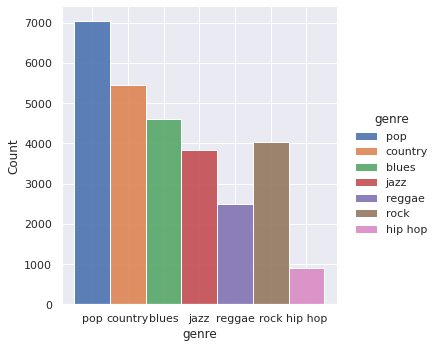

In [6]:
sns.displot(x="genre", data=df, hue = "genre",alpha = 0.9)

    BARPLOT DOS 10 ARTISTAS COM MAIS MÚSICAS 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'johnny cash'),
  Text(1, 0, 'ella fitzgerald'),
  Text(2, 0, 'dean martin'),
  Text(3, 0, 'willie nelson'),
  Text(4, 0, 'george jones'),
  Text(5, 0, 'elvis presley'),
  Text(6, 0, 'dolly parton'),
  Text(7, 0, 'waylon jennings'),
  Text(8, 0, 'george strait'),
  Text(9, 0, 'nina simone')])

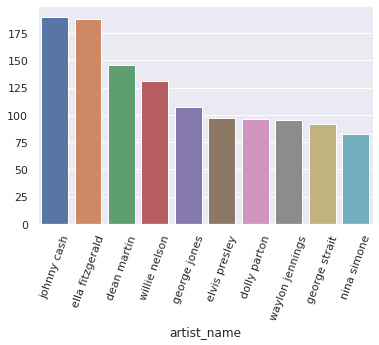

In [7]:
most_artist = df.value_counts("artist_name")
most5_artist = most_artist.head(10)
most5df = pd.DataFrame(most5_artist)
most5df.index
most5_artist.unique()

sns.barplot(x = most5df.index, y = most5_artist.unique(), data =df, alpha = 1)
plt.xticks(rotation = 70)